<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
        <h1 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.8;"> خوشه‌بند اشعار بوستان سعدی
        </h1>
        <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
         
            
<!--        </h3>
    </body> -->
</html>

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    ابتدا باید پکیج های مورد نیاز را نصب کنیم.
</html>    

In [1]:
!pip install nltk
!pip install hazm
!pip install future
!pip install bs4

In [1]:
from __future__ import unicode_literals
from hazm import *
from bs4 import BeautifulSoup
import sys
import codecs
import tqdm
import re
import codecs
import numpy as np
from __future__ import unicode_literals
import random
import os, os.path

Get number of files

In [2]:
boostanPath = "./Boostan"
golestanPath = "./Golestan"
NumOfBoostanFiles = len([name for name in os.listdir(boostanPath)])
NumOfGolestanFiles = len([name for name in os.listdir(golestanPath)])
NumOfBoostanFiles

230

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
        نام فایل های بوستان سعدی را در یک آرایه ذخیره میکنیم تا بعدا از آن استفاده کنیم.

</html> 

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
        فایل های بوستان
</html> 

In [3]:
print(os.getcwd()) 
boostan_folder_path = "./Boostan"

boostan_file_name = []
golestan_file_name = []

os.chdir(boostan_folder_path)
print(len(os.listdir()))
for filename in os.listdir():
    if os.path.isfile(filename):
        boostan_file_name.append(filename)

os.chdir("..")
print(os.getcwd()) 
boostan_file_name[0:10]

e:\university\14002\MIR\HW4\IR-HW4
230
e:\university\14002\MIR\HW4\IR-HW4


['bab10sh1.txt',
 'bab10sh2.txt',
 'bab10sh3.txt',
 'bab10sh4.txt',
 'bab1sh1.txt',
 'bab1sh10.txt',
 'bab1sh11.txt',
 'bab1sh12.txt',
 'bab1sh13.txt',
 'bab1sh14.txt']

make array for boostan

In [4]:
boostan = ''

for file in boostan_file_name:
    fi = open("./Boostan/"+file, "r", encoding="utf-8")
    text = fi.read()
    boostan += text
    boostan += "\n"

boostan_poems = boostan.split("\n")
boostan_poems[0:10]

['بیا تا برآریم دستی ز دل',
 'که نتوان برآورد فردا ز گل',
 'به فصل خزان در نبینی درخت',
 'که بی برگ ماند ز سرمای سخت',
 'برآرد تهی دستهای نیاز',
 'ز رحمت نگردد تهیدست باز',
 'مپندار از آن در که هرگز نبست',
 'که نومید گردد بر آورده دست',
 'قضا خلعتی نامدارش دهد',
 'قدر میوه در آستینش نهد']

# start preprocessing Boostan

normalize boostan

In [5]:
normalizer = Normalizer()
normalized_boostan_poems = []
for p in boostan_poems:
    normalized_boostan_poems.append(normalizer.normalize(p))
normalized_boostan_poems[0:10]

['بیا تا برآریم دستی ز دل',
 'که نتوان برآورد فردا ز گل',
 'به فصل خزان در نبینی درخت',
 'که بی برگ ماند ز سرمای سخت',
 'برآرد تهی دستهای نیاز',
 'ز رحمت نگردد تهیدست باز',
 'مپندار از آن در که هرگز نبست',
 'که نومید گردد بر آورده دست',
 'قضا خلعتی نامدارش دهد',
 'قدر میوه در آستینش نهد']

lemmatize and remove stopwords boostan

In [6]:
lemmatizer = Lemmatizer()
lemmatize_boostan_poems = []
all_cleaned_tokens = []
stopwords = [normalizer.normalize(x.strip()) for x in stopwords_list()]+["-", "/", "ز", '\ufeff', "]", "[", "?", "؟"]

mesra_boostan = []
mesra_boostan_tokenized = []

for p in normalized_boostan_poems:
    all_tokens =  word_tokenize(p)
    all_tokens_nonstop = [t for t in (all_tokens) if t not in stopwords]
    all_tokens_nonstop = [t for t in (all_tokens_nonstop) if len(t)>1]

    all_tokens_lemm = []
    for i in all_tokens_nonstop:
        all_tokens_lemm.append(lemmatizer.lemmatize(i))
    
    mesra_boostan.append(' '.join(all_tokens_lemm))
    # print(all_tokens_nonstop[0])
    mesra_boostan_tokenized.append(all_tokens_lemm)

print(mesra_boostan[0:10])
print(mesra_boostan_tokenized[0:10])

['آمد#آ برآریم دست دل', 'توانست#توان برآورد فردا گل', 'فصل خزان دید#بین درخت', 'برگ ماند#مان سرما سخت', 'برآرد تهی دست', 'رحمت گشت#گرد تهیدست', 'مپندار هرگز بست#بند', 'نومید آورده دست', 'قضا خلعت نامدار', 'قدر میوه آستین نهد']
[['آمد#آ', 'برآریم', 'دست', 'دل'], ['توانست#توان', 'برآورد', 'فردا', 'گل'], ['فصل', 'خزان', 'دید#بین', 'درخت'], ['برگ', 'ماند#مان', 'سرما', 'سخت'], ['برآرد', 'تهی', 'دست'], ['رحمت', 'گشت#گرد', 'تهیدست'], ['مپندار', 'هرگز', 'بست#بند'], ['نومید', 'آورده', 'دست'], ['قضا', 'خلعت', 'نامدار'], ['قدر', 'میوه', 'آستین', 'نهد']]


# Read Boostan with titles

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    ابتدا باید پکیج های مورد نیاز را نصب کنیم.
</html>    

In [8]:
!pip install bs4
!pip install pands

ERROR: Could not find a version that satisfies the requirement pands
ERROR: No matching distribution found for pands


In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    برای گرفتن نام اشعار، به صفحه بوستان ریکوئست میزنیم و نام ها را کرال میکنیم.
</html>    

In [9]:
boostan_url = "https://ganjoor.net/saadi/boostan"


request to boostan

In [10]:
boostan_response = requests.get(boostan_url)
boostan_response

<Response [200]>

extract boostan links

In [11]:
boostan_page = BeautifulSoup(boostan_response.content, "html.parser")
boostan_links = boostan_page.find_all('a', {'href': re.compile(r'/saadi/boostan/')})

print(boostan_links)

[<a href="/saadi/boostan/niyayesh">در نیایش خداوند</a>, <a href="/saadi/boostan/bab1">باب اول در عدل و تدبیر و رای</a>, <a href="/saadi/boostan/bab2">باب دوم در احسان</a>, <a href="/saadi/boostan/bab3">باب سوم در عشق و مستی و شور</a>, <a href="/saadi/boostan/bab4">باب چهارم در تواضع</a>, <a href="/saadi/boostan/bab5">باب پنجم در رضا</a>, <a href="/saadi/boostan/bab6">باب ششم در قناعت</a>, <a href="/saadi/boostan/bab7">باب هفتم در عالم تربیت</a>, <a href="/saadi/boostan/bab8">باب هشتم در شکر بر عافیت</a>, <a href="/saadi/boostan/bab9">باب نهم در توبه و راه صواب</a>, <a href="/saadi/boostan/bab10">باب دهم در مناجات و ختم کتاب</a>]


clean the arrays and just exist link

In [12]:
pre_url = "https://ganjoor.net/"

# start Boostan crawling

In [13]:
boostan_list_urls = []

for link in boostan_links:
    link = pre_url + link['href']
    boostan_list_urls.append(link)

boostan_list_urls

['https://ganjoor.net//saadi/boostan/niyayesh',
 'https://ganjoor.net//saadi/boostan/bab1',
 'https://ganjoor.net//saadi/boostan/bab2',
 'https://ganjoor.net//saadi/boostan/bab3',
 'https://ganjoor.net//saadi/boostan/bab4',
 'https://ganjoor.net//saadi/boostan/bab5',
 'https://ganjoor.net//saadi/boostan/bab6',
 'https://ganjoor.net//saadi/boostan/bab7',
 'https://ganjoor.net//saadi/boostan/bab8',
 'https://ganjoor.net//saadi/boostan/bab9',
 'https://ganjoor.net//saadi/boostan/bab10']

In [14]:
boostan_sec_names = []
y = len(boostan_list_urls)



for x in range(y):
    boostan_sec_names.append(boostan_list_urls[x].split("/")[6])

boostan_sec_names

['niyayesh',
 'bab1',
 'bab2',
 'bab3',
 'bab4',
 'bab5',
 'bab6',
 'bab7',
 'bab8',
 'bab9',
 'bab10']

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <p dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
        دیتای لازم را میگیریم و تگ های آن را پاک میکنیم.
</html>    

In [17]:
url = boostan_list_urls[1]
res = requests.get(url)
rgx = '/saadi/boostan/' + boostan_sec_names[1] + '/sh'
content = BeautifulSoup(res.content, "html.parser").find('article').find_all('a', {'href': re.compile(rgx)})
content[0:5]

[<a href="/saadi/boostan/bab1/sh1">بخش ۱ - سر آغاز</a>,
 <a href="/saadi/boostan/bab1/sh2">بخش ۲ - حکایت در تدبیر و تأخیر در سیاست</a>,
 <a href="/saadi/boostan/bab1/sh3">بخش ۳ - گفتار اندر بخشایش بر ضعیفان</a>,
 <a href="/saadi/boostan/bab1/sh4">بخش ۴ - در معنی شفقت بر حال رعیت</a>,
 <a href="/saadi/boostan/bab1/sh5">بخش ۵ - حکایت در شناختن دوست و دشمن را</a>]

In [19]:
c = str(content[0])
re.sub('<.*?>', '', c)
poem_names = []

for i in content:
    c = str(i)
    poem_names.append(re.sub('<.*?>', '', c))

poem_names

['بخش ۱ - سر آغاز',
 'بخش ۲ - حکایت در تدبیر و تأخیر در سیاست',
 'بخش ۳ - گفتار اندر بخشایش بر ضعیفان',
 'بخش ۴ - در معنی شفقت بر حال رعیت',
 'بخش ۵ - حکایت در شناختن دوست و دشمن را',
 'بخش ۶ - گفتار اندر نظر در حق رعیت مظلوم',
 'بخش ۷ - هم در این معنی',
 'بخش ۸ - حکایت در معنی شفقت',
 'بخش ۹ - حکایت اتابک تکله',
 'بخش ۱۰ - حکایت ملک روم با دانشمند',
 'بخش ۱۱ - حکایت مرزبان ستمگار با زاهد',
 'بخش ۱۲ - گفتار اندر نگه داشتن خاطر درویشان',
 'بخش ۱۳ - حکایت در معنی رحمت با ناتوانان در حال توانایی',
 'بخش ۱۴ - حکایت',
 'بخش ۱۵ - اندر معنی عدل و ظلم و ثمرهٔ آن',
 'بخش ۱۶ - حکایت برادران ظالم و عادل و عاقبت ایشان',
 'بخش ۱۷ - صفت جمعیت اوقات درویشان راضی',
 'بخش ۱۸ - حکایت عابد و استخوان پوسیده',
 'بخش ۱۹ - گفتار اندر نکوکاری و بدکاری و عاقبت آنها',
 'بخش ۲۰ - حکایت شحنه مردم آزار',
 'بخش ۲۱ - حکایت حجاج یوسف',
 'بخش ۲۲ - در نواخت رعیت و رحمت بر افتادگان',
 'بخش ۲۳ - حکایت در این معنی',
 'بخش ۲۴ - گفتار اندر بی\u200cوفائی دنیا',
 'بخش ۲۵ - در تغیر روزگار و انتقال مملکت',
 'بخش ۲۶ - حکایت قزل 

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    استخراج نام اشعار در همه باب ها و پاک کردن تگ های آن
</html>    

In [20]:
poem_names = []
ind = 0
for url in boostan_list_urls:
    res = requests.get(url)
    rgx = '/saadi/boostan/' + boostan_sec_names[ind] + '/sh'
    ind += 1
    content = BeautifulSoup(res.content, "html.parser").find('article').find_all('a', {'href': re.compile(rgx)})
    contentToStr = str(content[0])
    re.sub('<.*?>', '', contentToStr)
    for i in content:
        contentToStr = str(i)
        poem_names.append(re.sub('<.*?>', '', contentToStr))

Names of all poems saved in poem_names

In [22]:
poem_names[20:30]

['بخش ۱۵ - اندر معنی عدل و ظلم و ثمرهٔ آن',
 'بخش ۱۶ - حکایت برادران ظالم و عادل و عاقبت ایشان',
 'بخش ۱۷ - صفت جمعیت اوقات درویشان راضی',
 'بخش ۱۸ - حکایت عابد و استخوان پوسیده',
 'بخش ۱۹ - گفتار اندر نکوکاری و بدکاری و عاقبت آنها',
 'بخش ۲۰ - حکایت شحنه مردم آزار',
 'بخش ۲۱ - حکایت حجاج یوسف',
 'بخش ۲۲ - در نواخت رعیت و رحمت بر افتادگان',
 'بخش ۲۳ - حکایت در این معنی',
 'بخش ۲۴ - گفتار اندر بی\u200cوفائی دنیا']

# Save each poem to one element in array

In [23]:
import os

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    در این بخش هر شعر را به عنوان یک عنصر از آرایه ذخیره میکنیم.
</html>    

In [24]:
path = './Boostan/'
all_path = []
for filename in os.listdir(path):
    all_files = os.path.join(path, filename)
    if os.path.isfile(all_files):
        all_path.append(all_files)

In [25]:
all_path

['./Boostan/bab10sh1.txt',
 './Boostan/bab10sh2.txt',
 './Boostan/bab10sh3.txt',
 './Boostan/bab10sh4.txt',
 './Boostan/bab1sh1.txt',
 './Boostan/bab1sh10.txt',
 './Boostan/bab1sh11.txt',
 './Boostan/bab1sh12.txt',
 './Boostan/bab1sh13.txt',
 './Boostan/bab1sh14.txt',
 './Boostan/bab1sh15.txt',
 './Boostan/bab1sh16.txt',
 './Boostan/bab1sh17.txt',
 './Boostan/bab1sh18.txt',
 './Boostan/bab1sh19.txt',
 './Boostan/bab1sh2.txt',
 './Boostan/bab1sh20.txt',
 './Boostan/bab1sh21.txt',
 './Boostan/bab1sh22.txt',
 './Boostan/bab1sh23.txt',
 './Boostan/bab1sh24.txt',
 './Boostan/bab1sh25.txt',
 './Boostan/bab1sh26.txt',
 './Boostan/bab1sh27.txt',
 './Boostan/bab1sh28.txt',
 './Boostan/bab1sh29.txt',
 './Boostan/bab1sh3.txt',
 './Boostan/bab1sh30.txt',
 './Boostan/bab1sh31.txt',
 './Boostan/bab1sh32.txt',
 './Boostan/bab1sh33.txt',
 './Boostan/bab1sh34.txt',
 './Boostan/bab1sh35.txt',
 './Boostan/bab1sh36.txt',
 './Boostan/bab1sh37.txt',
 './Boostan/bab1sh38.txt',
 './Boostan/bab1sh39.txt',
 './

In [26]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for i, c in enumerate( re.split(r'(\d+)', text)) if c.isdigit()]

all_path.sort(key=natural_keys)
print(all_path[0:10])

['./Boostan/niyayeshsh1.txt', './Boostan/bab1sh1.txt', './Boostan/bab1sh2.txt', './Boostan/bab1sh3.txt', './Boostan/bab1sh4.txt', './Boostan/bab1sh5.txt', './Boostan/bab1sh6.txt', './Boostan/bab1sh7.txt', './Boostan/bab1sh8.txt', './Boostan/bab1sh9.txt']


In [28]:
poems_array = []
for p in all_path:
    path = p
    f = open(path, 'r', encoding='utf8')
    poems_array.append(f.read().replace("\n", " "))
poems_array[1]

'شنیدم که در وقت نزع روان به هرمز چنین گفت نوشیروان که خاطر نگهدار درویش باش نه در بند آسایش خویش باش نیاساید اندر دیار تو کس چو آسایش خویش جویی و بس نیاید به نزدیک دانا پسند شبان خفته و گرگ در گوسفند برو پاس درویش محتاج دار که شاه از رعیت بود تاجدار رعیت چو بیخند و سلطان درخت درخت، ای پسر، باشد از بیخ سخت مکن تا توانی دل خلق ریش وگر می\u200cکنی می\u200cکنی بیخ خویش اگر جاده\u200cای بایدت مستقیم ره پارسایان امید است و بیم طبیعت شود مرد را بخردی به امید نیکی و بیم بدی گر این هر دو در پادشه یافتی در اقلیم و ملکش پنه یافتی که بخشایش آرد بر امیدوار به امید بخشایش کردگار گزند کسانش نیاید پسند که ترسد که در ملکش آید گزند وگر در سرشت وی این خوی نیست در آن کشور آسودگی بوی نیست اگر پای بندی رضا پیش گیر وگر یک سواری سر خویش گیر فراخی در آن مرز و کشور مخواه که دلتنگ بینی رعیت ز شاه ز مستکبران دلاور بترس از آن کاو نترسد ز داور بترس دگر کشور آباد بیند به خواب که دارد دل اهل کشور خراب خرابی و بدنامی آید ز جور رسد پیش بین این سخن را به غور رعیت نشاید به بیداد کشت که مر سلطنت را پناهند و پشت مراعات ده

# Preprocessing Poems

normalize boostan

In [29]:
normalizer = Normalizer()
normalized_boostan_poems = []
for p in poems_array:
    normalized_boostan_poems.append(normalizer.normalize(p))
normalized_boostan_poems[0:1]

['به نام خداوند جان\u200cآفرین حکیم سخن\u200cدرزبان\u200cآفرین خداوند بخشندهٔ دستگیر کریم خطابخش پوزش\u200cپذیر عزیزی که هر کز درش سر بتافت به هر در که شد هیچ عزت نیافت سر پادشاهان گردن\u200cفراز به درگاه او بر زمین نیاز نه گردن\u200cکشان را بگیرد به فور نه عذرآوران را براند به جور وگر خشم گیرد ز کردار زشت چو بازآمدی ماجرا درنوشت اگر با پدر جنگ جوید کسی پدر بی\u200cگمان خشم گیرد بسی وگر خویش راضی نباشد ز خویش چو بیگانگانش براند ز پیش وگر بنده چابک نباشد به کار عزیزش ندارد خداوندگار وگر بر رفیقان نباشی شفیق به فرسنگ بگریزد از تو رفیق وگر ترک خدمت کند لشکری شود شاه لشکرکش از وی بری ولیکن خداوند بالا و پست به عصیان در رزق بر کس نبست دو کونش یکی قطره از بحر علم گنه بیند و پرده پوشد به حلم ادیم زمین، سفرهٔ عام اوست بر این خوان یغما چه دشمن چه دوست اگر بر جفاپیشه بشتافتی که از دست قهرش امان یافتی؟ بری ذاتش از تهمت ضد و جنس غنی ملکش از طاعت جن و انس پرستار امرش همه چیز و کس بنی\u200cآدم و مرغ و مور و مگس چنان پهن خوان کرم گسترد که سیمرغ در قاف قسمت خورد لطیف کرم\u200cگستر کارساز که دارای خلق 

lemmatize and remove stopwords boostan

In [30]:
lemmatizer = Lemmatizer()
lemmatize_boostan_poems = []
all_cleaned_tokens = []
stopwords = [normalizer.normalize(x.strip()) for x in stopwords_list()]+["-", "/", "ز", '\ufeff', "]", "[", "?", "؟"]

poems_boostan = []

for p in normalized_boostan_poems:
    all_tokens =  word_tokenize(p)
    all_tokens_nonstop = [t for t in (all_tokens) if t not in stopwords]
    all_tokens_nonstop = [t for t in (all_tokens_nonstop) if len(t)>1]

    all_tokens_lemm = []
    for i in all_tokens_nonstop:
        all_tokens_lemm.append(lemmatizer.lemmatize(i))
    
    poems_boostan.append(' '.join(all_tokens_lemm))

print(poems_boostan[0:1])

['نام خداوند جان\u200cآفرین حکیم سخن\u200cدرزبان\u200cآفرین خداوند بخشنده دستگیر کریم خطابخش پوزش\u200cپذیر عزیزی کز در سر بتافت عزت یافت#یاب سر پادشاه گردن\u200cفراز درگاه زمین گردن\u200cکشان گرفت#گیر فور عذرآوران براند جور وگر خشم کردار زشت چو بازآمدی ماجرا درنوشت پدر جنگ جست#جو پدر بی\u200cگمان خشم بس وگر راضی بود#باش چو بیگانگان براند وگر بنده چابک بود#باش کار عزیز خداوندگار وگر رفیق بود#باش شفیق فرسنگ بگریزد رفیق وگر ترک خدمت لشکر شاه لشکرک بری ولیکن خداوند پست عصیان رزق کس بست#بند کون قطره بحر علم گنه دید#بین پرده پوشید#پوش حلم ادیم زمین سفره عام اوست خوان یغما دشمن دوست جفاپیشه بشتافتی دست قهر امان یافت#یاب بری ذات تهمت ضد جنس غنی ملک طاعت جن انس پرستار امر کس بنی\u200cآدم مرغ مور مگس چنان پهن خوان کرم گسترد سیمرغ قاف قسمت خورد#خور لطیف کرم\u200cگستر کارساز خلق دانا راز مر رسید#رس کبریا منی ملک قدیم ذات غنی سر برنهد تاج بخت خاک اندر آرد تخت کلاه سعادت سر گلیم شقاوت برش گلستان آتش خلیل آتش برد آب نیل\u200cگر منشور احسان اوست ور توقیع فرمان اوست پرده دید#بین عمل بد پرده پوشید#پوش 

# Embedding with BERT

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    در این قسمت پس از پیش‌پردازش لازم است تا اشعار و ابیاتی که از بوستان مورد بررسی قرار داده‌ایم را
         به یک مدل
         embedding
         بدهیم و به این ترتیب بخواهیم آن را از قالب یک رشته به فرمت یک 
         vector
         دربیاوریم که بتوانیم روی این امبدینگ
         موارد مختلفی را بررسی کنیم و از فرمت آن که به صورت وکتور است استفاده کرد
         و کلاسترینگ و دیگر مسائل را حل نمود.
</html>    

In [40]:
!pip install sentence_transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=e227579610037123174bf6810192297f4832af2493d769daa423635924190b9a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\0c\b6\fb\2289a932c365293ad865fc1fe9d2db694d5584241c6d670874
Successfully built sentence-transformers


In [31]:
from sentence_transformers import SentenceTransformer

In [32]:
mesra_boostan = list(filter(None, mesra_boostan))
len(mesra_boostan)

8127

In [33]:
poems_array = list(filter(None, poems_array))
len(poems_array)

230

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
   در این قسمت برای هر دو مواردی که داریم، یعنی هم ابیات و هم اشعار به صورت جداگانه
         فرآیند امبدینگ را انجام می‌دهیم و در این راستا هم از
         BERT
         استفاده کرده‌ایم.
</html>    

## Mesra Embedding

In [34]:
model_mesra = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading: 100%|██████████| 190/190 [00:00<00:00, 47.5kB/s]
Downloading: 100%|██████████| 3.95k/3.95k [00:00<00:00, 2.00MB/s]
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 401B/s]
Downloading: 100%|██████████| 229/229 [00:00<00:00, 117kB/s]
Downloading: 100%|██████████| 438M/438M [11:08<00:00, 655kB/s]     
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 26.1kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 56.3kB/s]
Downloading: 100%|██████████| 466k/466k [00:06<00:00, 67.5kB/s] 
Downloading: 100%|██████████| 399/399 [00:00<00:00, 399kB/s]
Downloading: 100%|██████████| 232k/232k [00:05<00:00, 42.4kB/s] 


In [35]:
mesra_boostan_embeddings = model_mesra.encode(mesra_boostan) 
mesra_boostan_embeddings.shape

(8127, 768)

## Poems Embedding

In [36]:
model_poems = SentenceTransformer('bert-base-nli-mean-tokens')

In [37]:
poems_boostan_embeddings = model_poems.encode(poems_array) 
poems_boostan_embeddings.shape

(230, 768)

# Clustering with KMeans

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    در این قسمت از کتابخانه‌ی
         Sckit-Learn
         استفاده نموده‌ایم و به کمک آن سعی کرده‌ایم که با استفاده از متد 
         KMeans
         بیاییم و خوشه‌بندی روی اشعار و همچنین ابیات اشعار بوستان به صورت جداگانه انجام دهیم.
         سپس در ادامه برخی از آنها را به صورت نمایش گرافیکی نمایش داده‌ایم تا بیشتر قابل درک و شهود باشد.
</html>    

## Mesras Clustering

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    در این قسمت به ازای مقدار
         k
         های مختلف سعی می‌کنیم که 
         distoration
         را محاسبه نماییم و ببینیم که چقدر 
         distoration
         داریم و در نتیجه بخواهیم مقدار بهینه
         k
         را انتخاب کنیم.
         که در نهایت به عدد
         10
         خواهیم رسید.
</html>    

Finding the optimum K for the least distortion

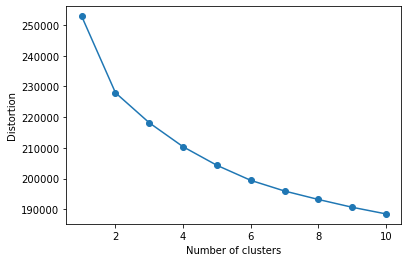

In [46]:
from sklearn.cluster import KMeans
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(mesra_boostan_embeddings)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [41]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10, random_state=0)
 
#predict the labels of clusters.
label = kmeans.fit_predict(mesra_boostan_embeddings)
 
print(label)

[0 4 7 ... 8 6 6]


<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    در این قسمت صرفا به عنوان نمونه کلاستر ۰ را نمایش داده‌ایم تا توزیع آن را نگاه‌کنیم. همانطور که می‌بینیم بسیار
         dense
         است و این نشانه‌ی خوبی است که داده‌ها به هم نزدیک هستند.
</html>    

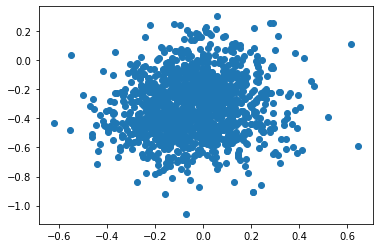

In [42]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = mesra_boostan_embeddings[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
    در اینجا نمایش گرافیکی هر ده کلاس را می‌بینیم که چون داده‌های اشعار زیاد است،
    بسیار داده‌های زیادی داریم ولی در کل تجمع داده‌ها در این روش هم قابل شهود است.
</html>    

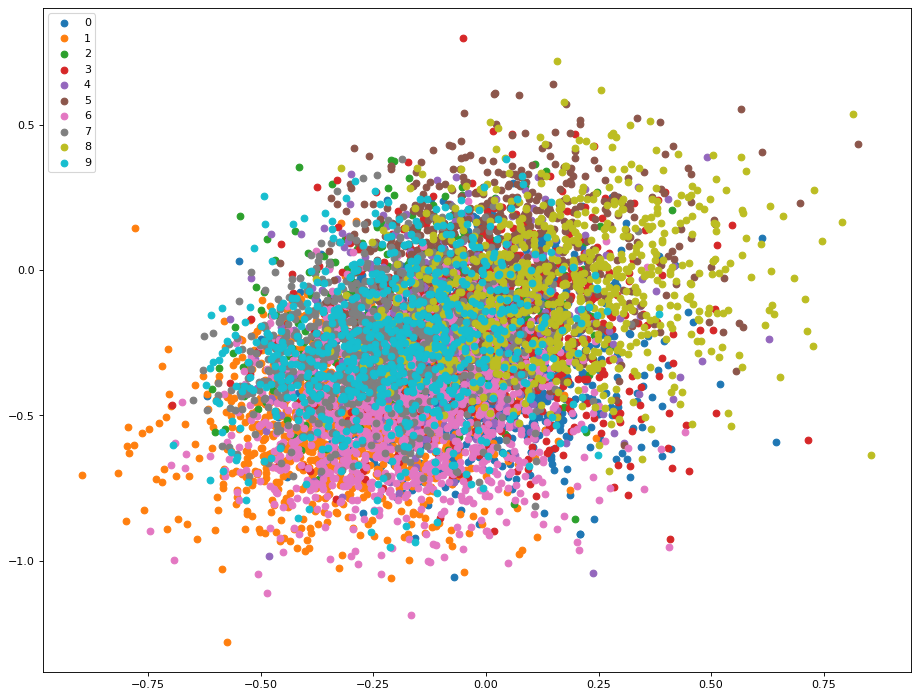

In [43]:
from matplotlib.pyplot import figure

figure(figsize=(14, 11), dpi=80)
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(mesra_boostan_embeddings[label == i , 0] , mesra_boostan_embeddings[label == i , 1] , label = i)
plt.legend()
plt.show()

## Poems Clustering

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
       در این قسمت هم بسیار شبیه به قسمت قبل عمل می‌کنیم. با این تفاوت که این موارد روی داده‌های اشعار
         به جای ابیات اجرا می‌شود.
</html>    

Finding the optimum K for the least distortion

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


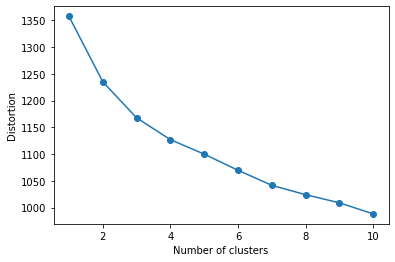

In [47]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(poems_boostan_embeddings)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [45]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans_poems = KMeans(n_clusters= 10, random_state=0)
 
#predict the labels of clusters.
label = kmeans.fit_predict(poems_boostan_embeddings)
 
print(label)

[3 3 6 2 9 3 5 9 9 2 5 3 6 8 0 4 4 8 5 6 3 6 6 6 3 8 8 8 2 6 4 6 5 4 5 3 4
 1 9 8 7 2 8 5 2 9 9 4 9 3 6 5 6 2 5 4 3 0 0 7 8 9 5 7 3 4 6 9 6 4 5 9 6 9
 3 1 8 3 6 9 6 3 9 3 7 2 6 9 3 2 2 3 9 4 2 5 0 3 2 4 6 6 3 9 6 3 9 9 9 3 2
 6 5 4 9 1 6 5 0 0 0 3 9 6 6 5 6 3 4 3 1 6 9 6 9 0 0 6 7 4 5 1 4 8 9 5 5 2
 1 9 7 0 1 2 1 4 6 6 8 9 4 4 2 1 3 1 8 6 3 9 5 9 3 9 6 6 6 4 2 8 1 3 3 0 1
 9 2 1 1 6 3 0 3 4 6 4 2 6 1 7 6 8 3 8 4 8 3 8 4 7 7 6 9 2 8 6 2 6 1 6 6 1
 0 2 2 3 4 5 2 3]


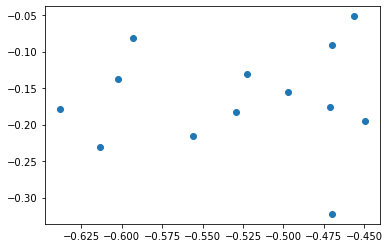

In [48]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = poems_boostan_embeddings[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
        در ادامه نمایش گرافیکی اشعار بوستان که خوشه‌بندی شده‌اند را با رنگ‌های مختلف
         می‌توانیم مشاهده نماییم.
         به این ترتیب برای اینکه نمودار خیلی شلوغ نشود لیبل‌های عددی به هریک از نقاط داده‌ایم و در پایین
         اشاره شده است که هر عدد نشان‌دهنده‌ی چه تیتر شعری از اشعار بوستان است.
         به این ترتیب این نمودار قابل تحلیل می‌باشد.
</html>    

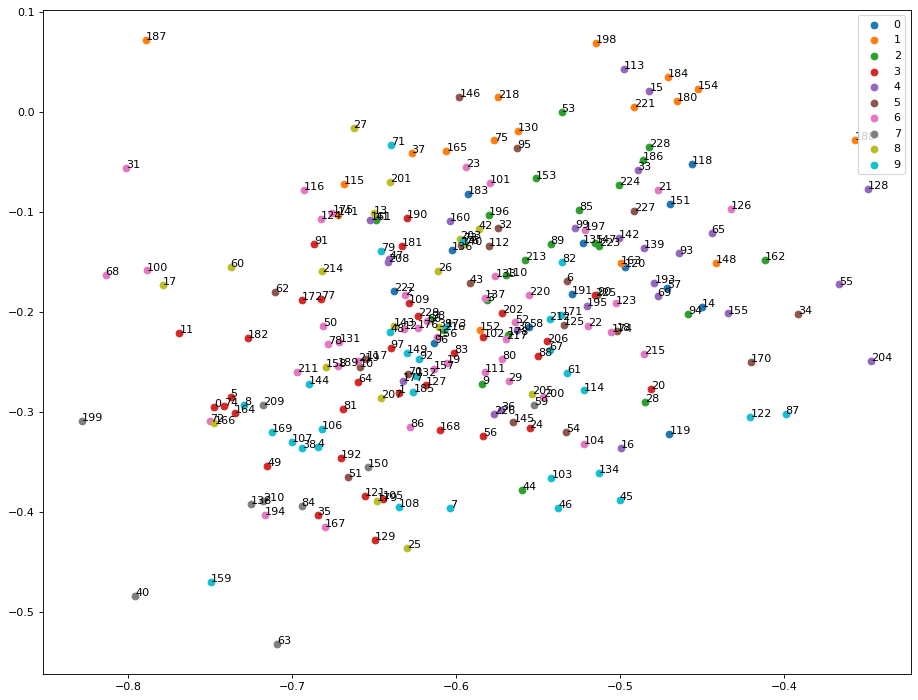

In [49]:
from matplotlib.pyplot import figure

figure(figsize=(14, 11), dpi=80)
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(poems_boostan_embeddings[label == i , 0] , poems_boostan_embeddings[label == i , 1] , label = i)
for i in range(len(poems_boostan_embeddings)):
    plt.text(poems_boostan_embeddings[i ,0], poems_boostan_embeddings[i ,1], str(i)) # poem_names[i]
plt.legend()
plt.show()

In [50]:
for i in range(len(poem_names)):
    print(f'Poem Number {i} title is: {poem_names[i]}')

Poem Number 0 title is: بخش ۱ - سرآغاز
Poem Number 1 title is: بخش ۲ - فی نعت سید المرسلین علیه الصلوة و السلام
Poem Number 2 title is: بخش ۳ - سبب نظم کتاب
Poem Number 3 title is: بخش ۴ - مدح ابوبکر بن سعد بن زنگی
Poem Number 4 title is: بخش ۵ - مدح محمد بن سعد بن ابوبکر
Poem Number 5 title is: بخش ۶ - حکایت
Poem Number 6 title is: بخش ۱ - سر آغاز
Poem Number 7 title is: بخش ۲ - حکایت در تدبیر و تأخیر در سیاست
Poem Number 8 title is: بخش ۳ - گفتار اندر بخشایش بر ضعیفان
Poem Number 9 title is: بخش ۴ - در معنی شفقت بر حال رعیت
Poem Number 10 title is: بخش ۵ - حکایت در شناختن دوست و دشمن را
Poem Number 11 title is: بخش ۶ - گفتار اندر نظر در حق رعیت مظلوم
Poem Number 12 title is: بخش ۷ - هم در این معنی
Poem Number 13 title is: بخش ۸ - حکایت در معنی شفقت
Poem Number 14 title is: بخش ۹ - حکایت اتابک تکله
Poem Number 15 title is: بخش ۱۰ - حکایت ملک روم با دانشمند
Poem Number 16 title is: بخش ۱۱ - حکایت مرزبان ستمگار با زاهد
Poem Number 17 title is: بخش ۱۲ - گفتار اندر نگه داشتن خاطر درویشان


# Comparing Clusters with Boostan Babs

In [51]:
cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
cluster_7 = []
cluster_8 = []
cluster_9 = []
for i in range(len(label)):
    if label[i] == 0:
        cluster_0.append(poems_array[i])
    elif label[i] == 1:
        cluster_1.append(poems_array[i])
    elif label[i] == 2:
        cluster_2.append(poems_array[i])
    elif label[i] == 3:
        cluster_3.append(poems_array[i])
    elif label[i] == 4:
        cluster_4.append(poems_array[i])
    elif label[i] == 5:
        cluster_5.append(poems_array[i])
    elif label[i] == 6:
        cluster_6.append(poems_array[i])
    elif label[i] == 7:
        cluster_7.append(poems_array[i])
    elif label[i] == 8:
        cluster_8.append(poems_array[i])
    elif label[i] == 9:
        cluster_9.append(poems_array[i])

In [52]:
def preprocess_query(query):
    normalizer = Normalizer()
    lemmatizer = Lemmatizer()
    stopwords = [normalizer.normalize(x.strip()) for x in stopwords_list()]+["-", "/", "ز", '\ufeff', "]", "[", "?", "؟"]
    query_normalized = normalizer.normalize(query)
    all_tokens = word_tokenize(query_normalized)
    all_tokens_nonstop = [t for t in (all_tokens) if t not in stopwords]
    all_tokens_nonstop = [t for t in (all_tokens_nonstop) if len(t)>1]

    all_tokens_lemm = []
    for i in all_tokens_nonstop:
        all_tokens_lemm.append(lemmatizer.lemmatize(i))
        
    return ' '.join(all_tokens_lemm)

In [53]:
boostan_baabs ={}
for file in boostan_file_name:
    if file.startswith('b'):
        baab_name = int(re.findall(r'\d+',file)[0])
    else :
        baab_name = 'n'+ re.findall(r'\d+',file)[0]
    if not baab_name in boostan_baabs.keys():
        boostan_baabs[baab_name] = []
    fi = open("./Boostan/"+file, "r", encoding="utf-8")
    text = fi.read().replace('\n',' ')
    boostan_baabs[baab_name].append(text)

In [54]:
cluster_0_numbers = {}
cluster_1_numbers = {}
cluster_2_numbers = {}
cluster_3_numbers = {}
cluster_4_numbers = {}
cluster_5_numbers = {}
cluster_6_numbers = {}
cluster_7_numbers = {}
cluster_8_numbers = {}
cluster_9_numbers = {}

def find_baabs(cluster):
    cluster_0_numbers = {}
    for baab in boostan_baabs:
        if baab not in cluster_0_numbers.keys():
            cluster_0_numbers[baab] = []
        for poems in boostan_baabs[baab]:
            for i in cluster:
                if i in poems:
                    cluster_0_numbers[baab].append(1)
    return cluster_0_numbers

cluster_0_numbers = find_baabs(cluster_0)
cluster_1_numbers = find_baabs(cluster_1)
cluster_2_numbers = find_baabs(cluster_2)
cluster_3_numbers = find_baabs(cluster_3)
cluster_4_numbers = find_baabs(cluster_4)
cluster_5_numbers = find_baabs(cluster_5)
cluster_6_numbers = find_baabs(cluster_6)
cluster_7_numbers = find_baabs(cluster_7)
cluster_8_numbers = find_baabs(cluster_8)
cluster_9_numbers = find_baabs(cluster_9)

In [55]:
def get_percentage(cluster_dict,cluster_num):
    percentage_dict = {}
    for i in cluster_dict:
        percentage_dict[i] = (sum(cluster_dict[i])/len(cluster_num))*100
    return percentage_dict

In [56]:
cluster_0_percentages = get_percentage(cluster_0_numbers,cluster_0)
cluster_1_percentages = get_percentage(cluster_1_numbers,cluster_1)
cluster_2_percentages = get_percentage(cluster_2_numbers,cluster_2)
cluster_3_percentages = get_percentage(cluster_3_numbers,cluster_3)
cluster_4_percentages = get_percentage(cluster_4_numbers,cluster_4)
cluster_5_percentages = get_percentage(cluster_5_numbers,cluster_5)
cluster_6_percentages = get_percentage(cluster_6_numbers,cluster_6)
cluster_7_percentages = get_percentage(cluster_7_numbers,cluster_7)
cluster_8_percentages = get_percentage(cluster_8_numbers,cluster_8)
cluster_9_percentages = get_percentage(cluster_9_numbers,cluster_9)

In [60]:
import operator
print(" {} : highest presence in a baab is : {}".
      format(max(cluster_0_percentages.items(),key=operator.itemgetter(1))[0],
             cluster_0_percentages[max(cluster_0_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}".
      format(max(cluster_1_percentages.items(),key=operator.itemgetter(1))[0],
             cluster_1_percentages[max(cluster_1_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_2_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_2_percentages[max(cluster_2_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_3_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_3_percentages[max(cluster_3_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_4_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_4_percentages[max(cluster_4_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_5_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_5_percentages[max(cluster_5_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_6_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_6_percentages[max(cluster_6_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_7_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_7_percentages[max(cluster_7_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_8_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_8_percentages[max(cluster_8_percentages.items(),key=operator.itemgetter(1))[0]]))

print(" {} : highest presence in a baab is : {}"
      .format(max(cluster_9_percentages.items(),key=operator.itemgetter(1))[0],
              cluster_9_percentages[max(cluster_9_percentages.items(),key=operator.itemgetter(1))[0]]))


 4 : highest presence in a baab is : 23.076923076923077
 7 : highest presence in a baab is : 35.294117647058826
 3 : highest presence in a baab is : 21.73913043478261
 3 : highest presence in a baab is : 20.588235294117645
 1 : highest presence in a baab is : 20.833333333333336
 1 : highest presence in a baab is : 26.31578947368421
 1 : highest presence in a baab is : 19.047619047619047
 2 : highest presence in a baab is : 22.22222222222222
 1 : highest presence in a baab is : 33.33333333333333
 2 : highest presence in a baab is : 19.35483870967742


<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
        برای ارزیابی روشی که انجام دادیم، از معیار purity 
        استفاده کردیم که در ادامه فرمول آن را بررسی میکنیم.

</html>    

$
purity(\Omega, C)=\frac{1}{N}\sum_k \max_j(w_k, c_j)
$

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
     حال طبق فرمول بالا purity را محاسبه میکنیم

</html>    

In [103]:
highestPresence = [cluster_0_percentages[max(cluster_0_percentages.items(),key=operator.itemgetter(1))[0]], 
        cluster_1_percentages[max(cluster_1_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_2_percentages[max(cluster_2_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_3_percentages[max(cluster_3_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_4_percentages[max(cluster_4_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_5_percentages[max(cluster_5_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_6_percentages[max(cluster_6_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_7_percentages[max(cluster_7_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_8_percentages[max(cluster_8_percentages.items(),key=operator.itemgetter(1))[0]],
        cluster_9_percentages[max(cluster_9_percentages.items(),key=operator.itemgetter(1))[0]]]

#calculate the purity = 1/N sum(maxj(ck, wj))
sum = 0

for i in highestPresence :
        sum += i * (16 / 100)

sum / 160

0.24180554257275172

<html> 
    <head>
        <link rel="preconnect" href="//fdn.fontcdn.ir">
        <link rel="preconnect" href="//v1.fontapi.ir">
        <link href="https://v1.fontapi.ir/css/Vazir" rel="stylesheet">
    </head>
    <body>
     <h3 dir="rtl" style="font-family: 'Vazir', sans-serif; line-height: 1.6;">
        همانطور که مشاهده میکنید،
        مقدار purity 
        بدست آمده 0.24 است که در دنیای واقعی و با توجه به مقدار قابل قبول برای purity مقدار قابل قبولی است.

</html>    